Life cycle of Machine Learning Project

1. Understanding the problem statement
2. Data Collections
3. Data checks to perform
4. Exploratory Data Analysis
5. Model Training
6. Choose best model

1. Problem Statement-

This project understands how the student's performace (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch, and Test preparation course.

2. Data Collection-

Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 columns and 1000 rows

2.1 Import Data and Required Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv("stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [5]:
df.shape

(1000, 8)

2.2 Dataset information

1. gender : sex of students -> (Male/female)
2. race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
3. parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
4. lunch : having lunch before test (standard or free/reduced)
5. test preparation course : complete or not complete before test
6. math score
7. reading score
8. writing score

3. Data Checks to perform-

    1. Check missing values
    2. Check duplicates
    3. Check data type
    4. Check the number of unique values of each column
    5. Check statistics of dataset
    6. Check various categories present in the different categorical column

3.1 Check missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

3.2 Check duplicates

In [7]:
df.duplicated().sum()

0

3.3 Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Check the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 Check statistics of dataset

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From above description of numerical data, all means are very close to each other - between 66 and 68.05;

All standard deviations are also close - between 14.6 and 15.19;

While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

3.6 Exploring Data

In [11]:
print(df.gender.unique())
print(df.race_ethnicity.unique())
print(df.parental_level_of_education.unique())
print(df.lunch.unique())
print(df.test_preparation_course.unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [12]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(num_features)
print(cat_features)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for total and average scores

In [13]:
df['total_score'] = df.math_score + df.reading_score +df.writing_score
df['avg_score'] = df.total_score/3

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
math_full = df[df.math_score == 100]['avg_score'].count()
print(math_full)

7


In [16]:
reading_full = df[df.reading_score == 100]['avg_score'].count()
print(reading_full)

17


In [17]:
writing_full = df[df.writing_score == 100]['avg_score'].count()
print(writing_full)

14


In [18]:
math_less_20 = df[df.math_score <= 20]['avg_score'].count()
print(math_less_20)

4


In [19]:
reading_less_20 = df[df.reading_score <= 20]['avg_score'].count()
print(reading_less_20)

1


In [20]:
writing_less_20 = df[df.writing_score <= 20]['avg_score'].count()
print(writing_less_20)

3


From above values we get students have performed the worst in Maths

Best performance is in reading section

4. Exploring Data (Visualization)

4.1 Visualize average score distribution

Histogram

Kernel distribution function (KDE)

4.1.1 Histogram and KDE

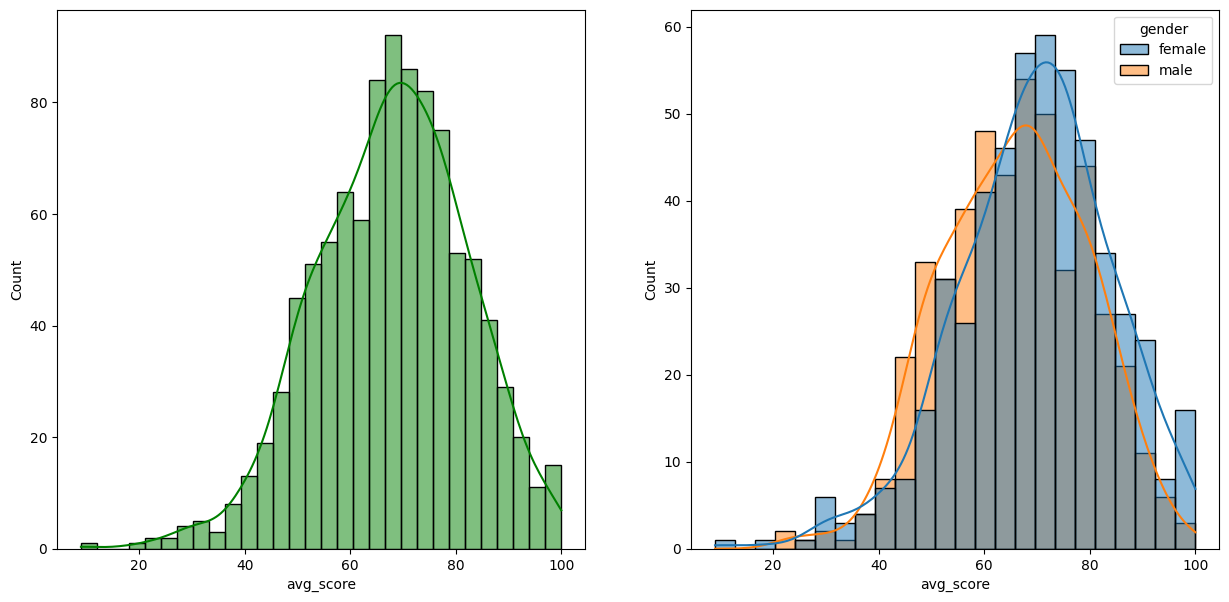

In [21]:
fig, axs = plt.subplots(1,2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data = df, x = "avg_score", bins= 30, kde= True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = "avg_score", kde= True, hue= 'gender')
plt.show()

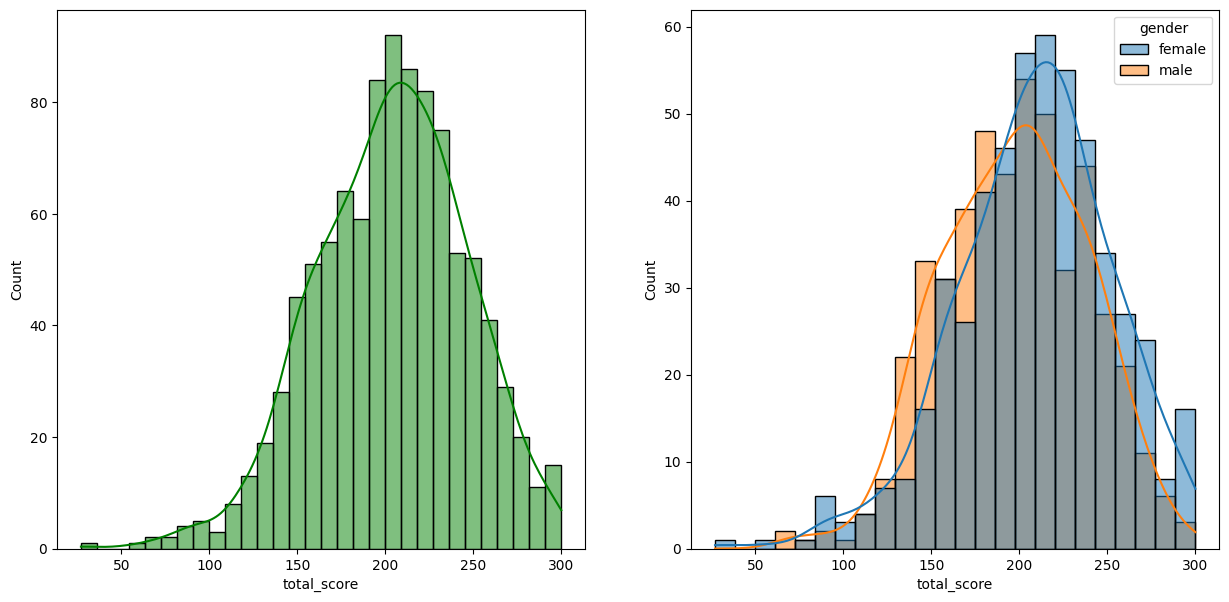

In [22]:
fig, axs = plt.subplots(1,2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data = df, x = "total_score", bins= 30, kde= True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = "total_score", kde= True, hue= 'gender')
plt.show()

Female students tend to perform well then male students

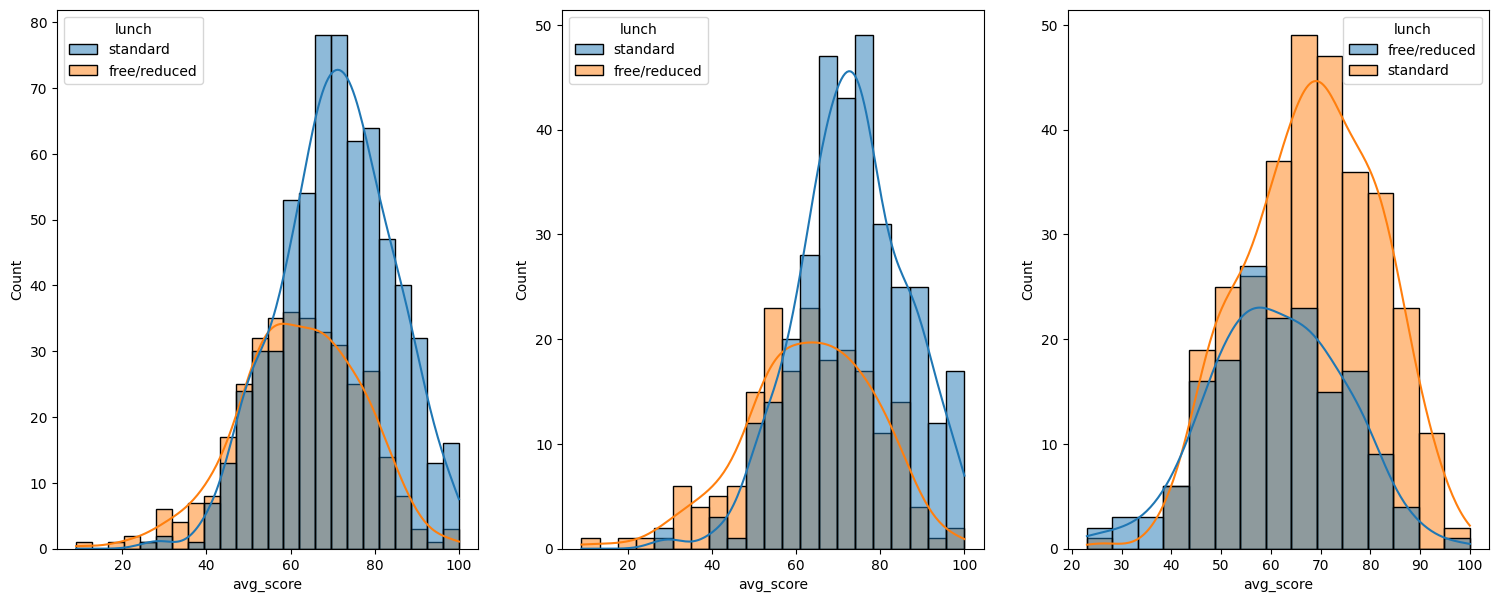

In [23]:
plt.subplots(1,3, figsize=(25,7))
plt.subplot(141)
sns.histplot(data = df, x = "avg_score", kde= True, hue = "lunch")
plt.subplot(142)
sns.histplot(data = df[df.gender == "female"], x = "avg_score", kde= True, hue = "lunch")
plt.subplot(143)
sns.histplot(data = df[df.gender == "male"], x = "avg_score", kde= True, hue = "lunch")
plt.show()

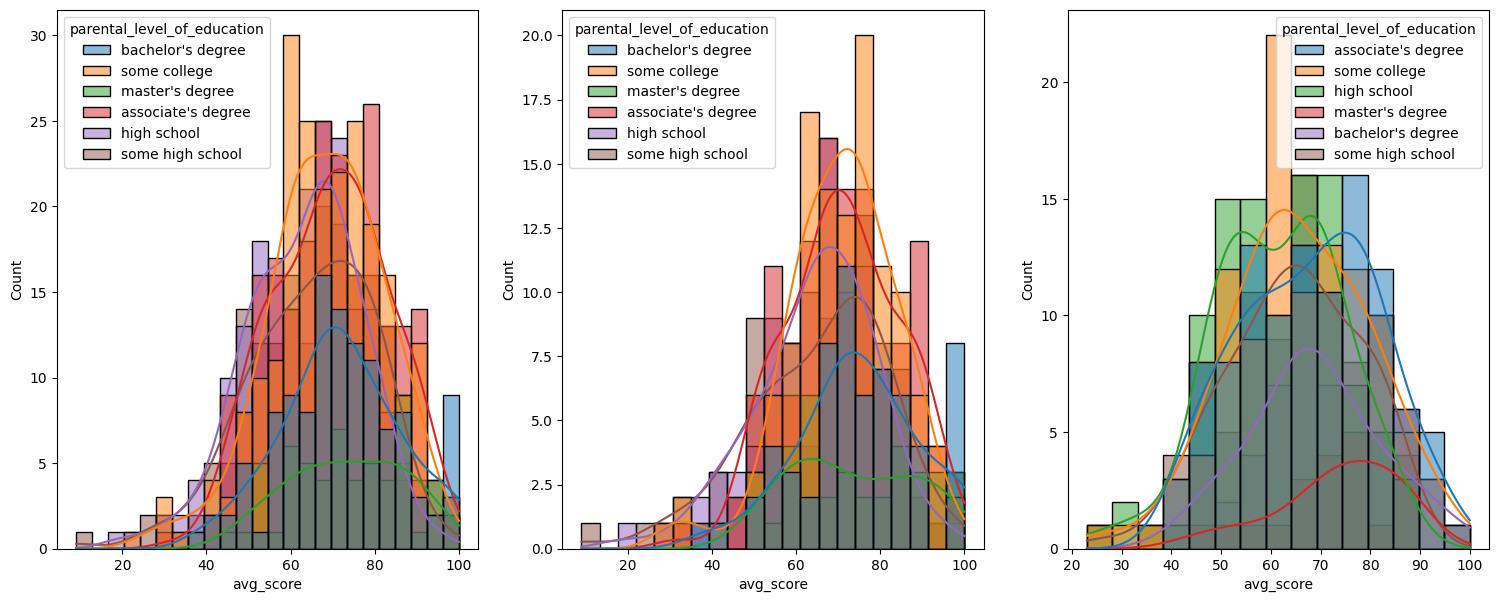

In [24]:
plt.subplots(1,3, figsize=(25,7))
plt.subplot(141)
sns.histplot(data = df, x = "avg_score", kde= True, hue = "parental_level_of_education")
plt.subplot(142)
sns.histplot(data = df[df.gender == "female"], x = "avg_score", kde= True, hue = "parental_level_of_education")
plt.subplot(143)
sns.histplot(data = df[df.gender == "male"], x = "avg_score", kde= True, hue = "parental_level_of_education")
plt.show()

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their female child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on male students.

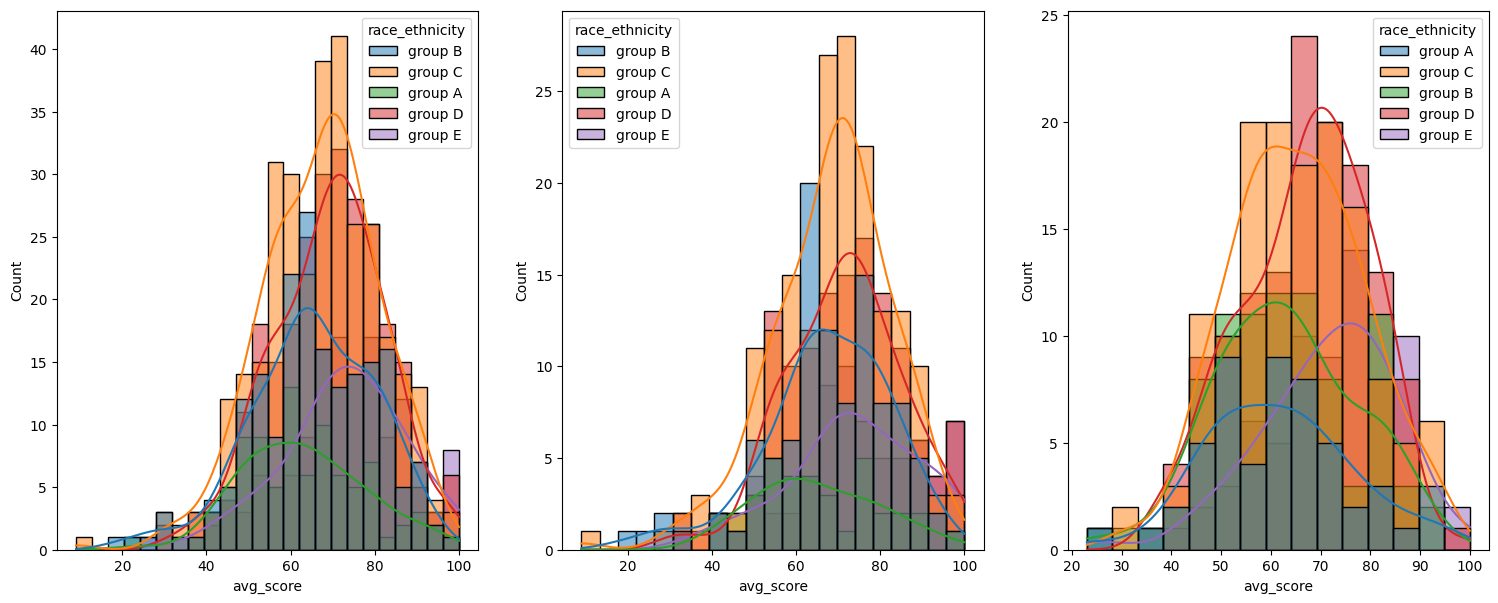

In [25]:
plt.subplots(1,3, figsize=(25,7))
plt.subplot(141)
sns.histplot(data = df, x = "avg_score", kde= True, hue = "race_ethnicity")
plt.subplot(142)
sns.histplot(data = df[df.gender == "female"], x = "avg_score", kde= True, hue = "race_ethnicity")
plt.subplot(143)
sns.histplot(data = df[df.gender == "male"], x = "avg_score", kde= True, hue = "race_ethnicity")
plt.show()

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

4.2 Maximumum score of students in all three subjects

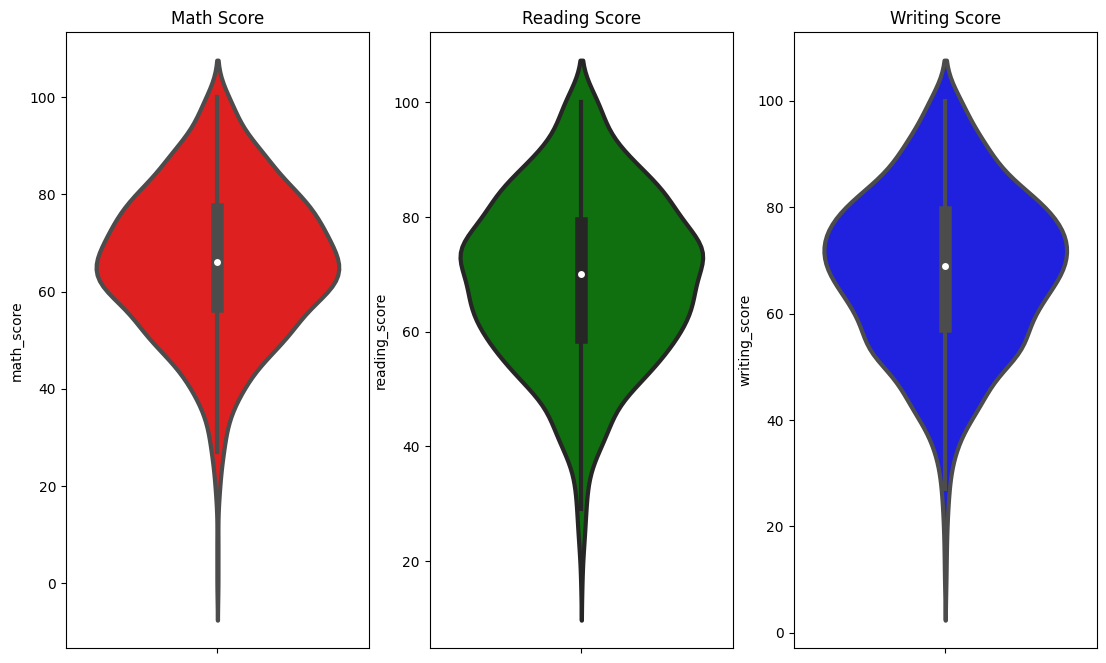

In [26]:
plt.figure(figsize = (18,8))
plt.subplot(141)
plt.title("Math Score")
sns.violinplot(data = df, y = "math_score", color= "red", linewidth= 3)
plt.subplot(142)
plt.title("Reading Score")
sns.violinplot(data = df, y = "reading_score", color= "green", linewidth= 3)
plt.subplot(143)
plt.title("Writing Score")
sns.violinplot(data = df, y = "writing_score", color= "blue", linewidth= 3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

4.3 Multivariate analysis using pieplot

In [27]:
print(df.gender.value_counts())
print(df.race_ethnicity.value_counts())
print(df.lunch.value_counts())
print(df.test_preparation_course.value_counts())
print(df.parental_level_of_education.value_counts())

gender
female    518
male      482
Name: count, dtype: int64
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test_preparation_course
none         642
completed    358
Name: count, dtype: int64
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


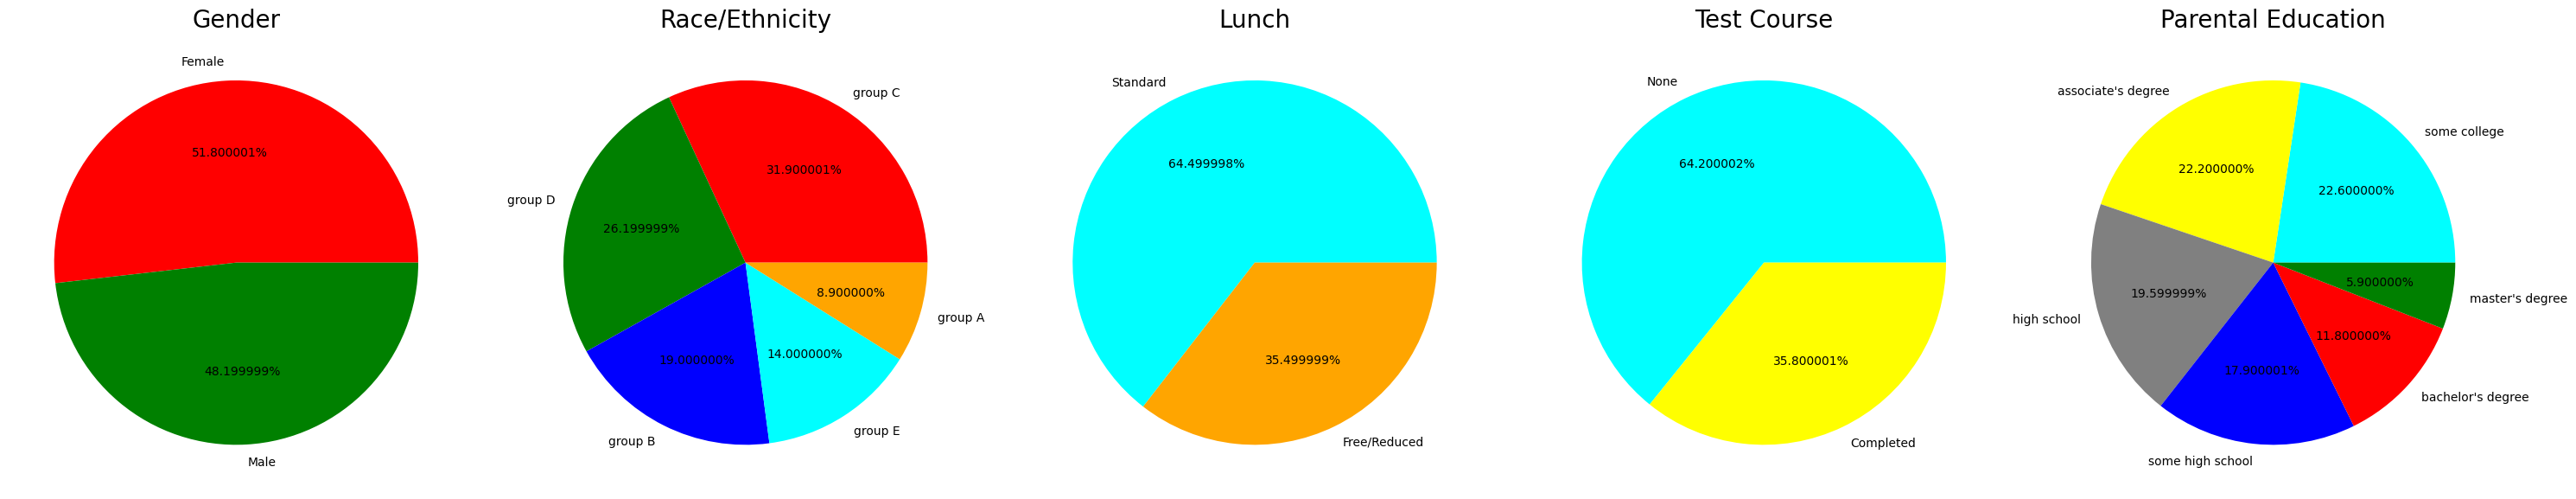

In [28]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(151)
size = df.gender.value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']
plt.pie(size, colors= color, labels= labels, autopct= '%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(152)
size = df.race_ethnicity.value_counts()
labels = 'group C', 'group D', 'group B', 'group E', 'group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors= color, labels= labels, autopct= '%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(153)
size = df.lunch.value_counts()
labels = 'Standard', 'Free/Reduced'
color = ['cyan', 'orange']
plt.pie(size, colors= color, labels= labels, autopct= '%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(154)
size = df.test_preparation_course.value_counts()
labels = 'None', 'Completed'
color = ['cyan', 'yellow']
plt.pie(size, colors= color, labels= labels, autopct= '%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(155)
size = df.parental_level_of_education.value_counts()
labels = 'some college', "associate's degree", 'high school', 'some high school', "bachelor's degree", "master's degree"
color = ['cyan', 'yellow', 'gray', 'blue', 'red', 'green']
plt.pie(size, colors= color, labels= labels, autopct= '%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Number of male and female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

4.4. Feature wise Visualization

4.4.1 Gender column

1. Gender distribution
2. Impact of gender on student's performance

Univariate analysis

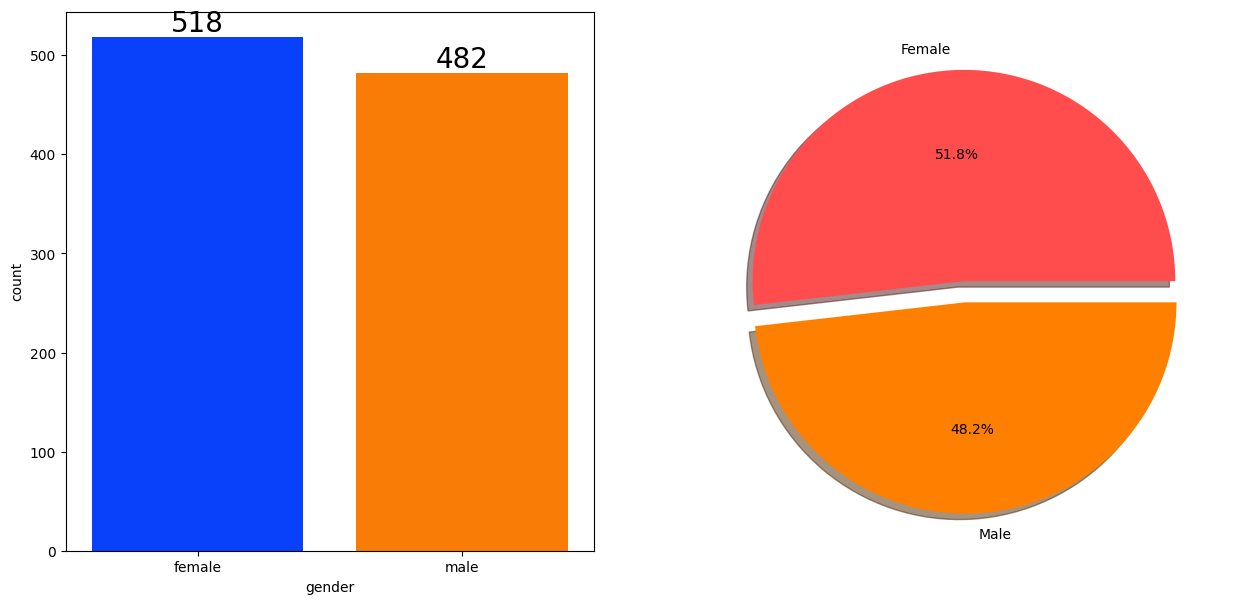

In [29]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
sns.countplot(data  = df, x = df.gender, palette= 'bright', ax= ax[0], saturation= 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

plt.pie(x = df.gender.value_counts(), labels = ['Female', 'Male'], explode=[0, 0.1], autopct= '%1.1f%%', shadow= True, colors=['#ff4d4d','#ff8000'])
plt.show()

Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)

Bivariate analysis

In [30]:
gender_group = df.groupby('gender').mean()
gender_group

TypeError: Could not convert group Bgroup Cgroup Bgroup Bgroup Bgroup Bgroup Bgroup Agroup Cgroup Bgroup Cgroup Bgroup Cgroup Cgroup Dgroup Dgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Bgroup Egroup Agroup Cgroup Dgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Cgroup Cgroup Dgroup Agroup Dgroup Egroup Bgroup Cgroup Cgroup Dgroup Agroup Dgroup Cgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Dgroup Bgroup Bgroup Dgroup Dgroup Egroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Dgroup Cgroup Egroup Cgroup Dgroup Bgroup Cgroup Egroup Bgroup Egroup Egroup Cgroup Bgroup Bgroup Cgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Cgroup Egroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Bgroup Bgroup Bgroup Cgroup Egroup Cgroup Dgroup Cgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Dgroup Bgroup Egroup Cgroup Bgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Dgroup Egroup Dgroup Dgroup Cgroup Egroup Cgroup Dgroup Dgroup Bgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Bgroup Cgroup Cgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Bgroup Dgroup Cgroup Bgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Cgroup Dgroup Agroup Dgroup Cgroup Dgroup Dgroup Dgroup Dgroup Agroup Bgroup Egroup Agroup Egroup Egroup Cgroup Dgroup Dgroup Cgroup Bgroup Cgroup Cgroup Agroup Dgroup Cgroup Cgroup Bgroup Dgroup Dgroup Cgroup Cgroup Dgroup Dgroup Agroup Cgroup Cgroup Agroup Cgroup Dgroup Agroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Egroup Egroup Cgroup Cgroup Dgroup Agroup Cgroup Cgroup Cgroup Dgroup Bgroup Dgroup Dgroup Dgroup Bgroup Cgroup Agroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Dgroup Bgroup Egroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Egroup Dgroup Bgroup Cgroup Cgroup Dgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Dgroup Agroup Cgroup Bgroup Cgroup Cgroup Bgroup Dgroup Cgroup Dgroup Egroup Dgroup Cgroup Cgroup Egroup Bgroup Bgroup Dgroup Dgroup Egroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Agroup Egroup Cgroup Cgroup Dgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Egroup Bgroup Cgroup Cgroup Agroup Cgroup Egroup Cgroup Egroup Cgroup Bgroup Cgroup Bgroup Dgroup Dgroup Dgroup Bgroup Egroup Bgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Bgroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Dgroup Bgroup Egroup Cgroup Dgroup Cgroup Egroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Cgroup Agroup Dgroup Egroup Bgroup Dgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Cgroup Cgroup Cgroup Bgroup Egroup Dgroup Bgroup Cgroup Egroup Bgroup Agroup Cgroup Cgroup Cgroup Cgroup Egroup Dgroup Cgroup Dgroup Bgroup Bgroup Cgroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Agroup Dgroup Bgroup Bgroup Cgroup Bgroup Egroup Bgroup Cgroup Bgroup Dgroup Bgroup Egroup Egroup Cgroup Egroup Bgroup Cgroup Dgroup Egroup Cgroup Cgroup Agroup Bgroup Cgroup Agroup Dgroup Bgroup Cgroup Cgroup Cgroup Dgroup Agroup Cgroup Bgroup Cgroup Agroup Cgroup Dgroup Bgroup Dgroup Cgroup Agroup Egroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Cgroup Dgroup Dgroup Egroup Bgroup Egroup Cgroup Egroup Dgroup Egroup Egroup Agroup Egroup Egroup Bgroup Dgroup Cgroup Agroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Bgroup Egroup Cgroup Cgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Bgroup Cgroup Dgroup Egroup Dgroup Egroup Cgroup Dgroup Dgroup Agroup Dgroup Egroup Cgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Agroup Dgroup Bgroup Dgroup Dgroup Egroup Cgroup Dgroup D to numeric

4.4.2 Race/Ethnicity column

1. Group wise distribution
2. Impact on students performance

Univariate analysis

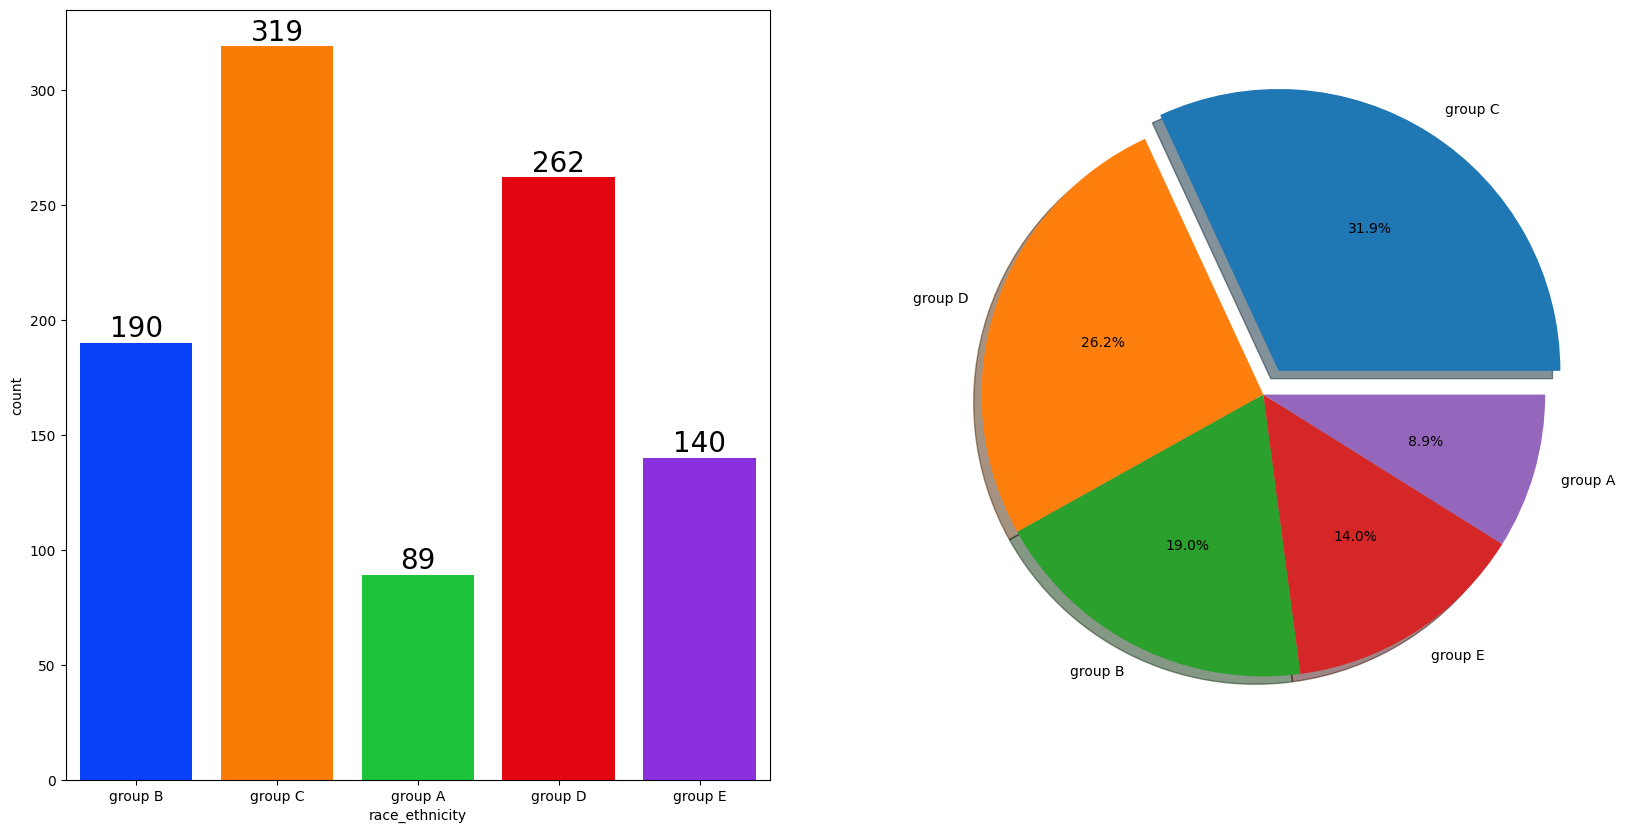

In [32]:
fig, ax = plt.subplots(1,2,figsize = (20,10))
sns.countplot(x= df.race_ethnicity, data = df, palette= 'bright', ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

plt.pie(x= df.race_ethnicity.value_counts(), labels= df.race_ethnicity.value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

Most of the student belonging from group C /group D.

Lowest number of students belong to groupA.

Bivariate analysis

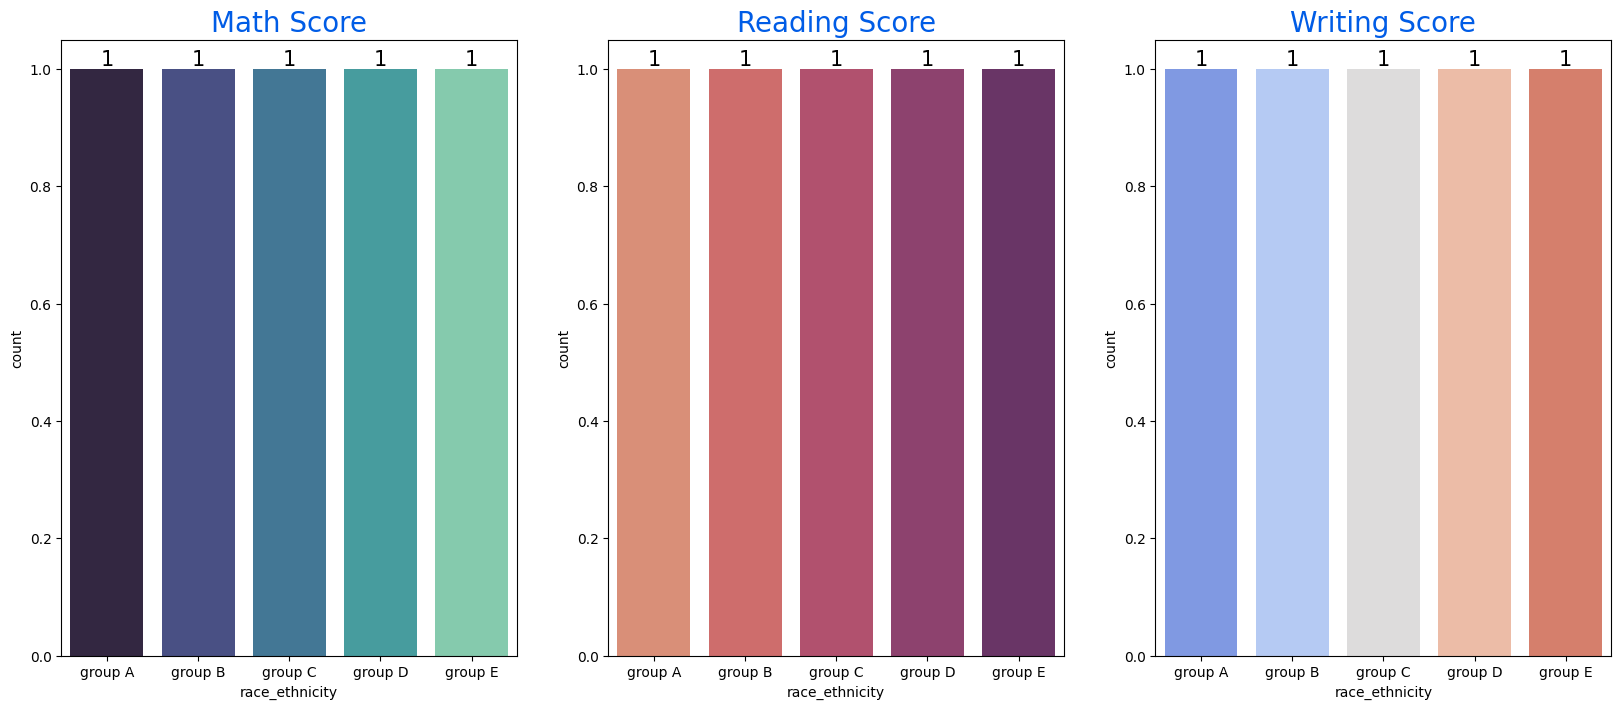

In [34]:
group_data = df.groupby('race_ethnicity')
fig, ax = plt.subplots(1,3, figsize =(20,8))
sns.barplot(x = group_data.math_score.mean().index, y = group_data.math_score.mean().value_counts(), palette= 'mako', ax= ax[0])
ax[0].set_title('Math Score', color = '#005ce6', size = 20)

for container in ax[0].containers:
    ax[0].bar_label(container, color= 'black', size = 15)

sns.barplot(x = group_data.reading_score.mean().index, y = group_data.reading_score.mean().value_counts(), palette= 'flare', ax= ax[1])
ax[1].set_title('Reading Score', color = '#005ce6', size = 20)

for container in ax[1].containers:
    ax[1].bar_label(container, color= 'black', size = 15)

sns.barplot(x = group_data.writing_score.mean().index, y = group_data.writing_score.mean().value_counts(), palette= 'coolwarm', ax= ax[2])
ax[2].set_title('Writing Score', color = '#005ce6', size = 20)

for container in ax[2].containers:
    ax[2].bar_label(container, color= 'black', size = 15)

Group E students have scored the highest marks

Group A students have scored the lowest marks

Students from a lower Socioeconomic status have a lower avg in all course subjects

4.4.3 Parental level of education column

1. Educational background of students parents
2. Impact on students performance

Univariate analysis

In [35]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df.parental_level_of_education, palette= 'Blues')
plt.title('Comparison of parental education', fontweight= 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

ValueError: could not convert string to float: "bachelor's degree"

Bivariate analysis

In [38]:
df.groupby('parental_level_of_education').agg('mean').plot(kind= 'barh', figsize= (10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

TypeError: Could not convert malefemalemalemalefemalemalefemalefemalemalemalefemalefemalefemalemalefemalefemalemalefemalemalemalefemalemalefemalefemalemalefemalemalefemalemalemalefemalemalefemalefemalemalemalefemalemalemalefemalefemalemalemalefemalefemalefemalemalefemalemalefemalemalefemalemalefemalemalefemalemalemalemalemalemalefemalemalefemalefemalemalemalemalemalemalemalefemalemalefemalefemalefemalefemalemalefemalemalemalemalemalemalemalemalefemalemalemalefemalemalefemalemalefemalemalefemalemalemalemalefemalemalemalemalefemalemalefemalefemalemalefemalefemalefemalefemalemalemalefemalefemalefemalemalefemalefemalefemalefemalefemalefemalefemalemalefemalemalemalemalefemalefemalefemalemalefemalefemalemalemalefemalefemalefemalefemalefemalefemalemalemalemalefemalefemalefemalefemalemalefemalemalemalemalemalefemalemalemalefemalefemalefemalefemalefemalefemalefemalemalefemalemalefemalefemalemalemalefemalefemalemalemalefemalemalefemalefemalemalefemalefemalefemalefemalefemalemalefemalemalemalefemalemalemalemalemalemalemalefemalefemalefemalefemalefemalefemalemalefemalefemalefemalemalemalemalemalemalefemalemalefemalefemalemalefemalefemalefemale to numeric

4.4.4 Lunch column

1. Which type of lunch is most common amoung students ?
2. What is the effect of lunch type on test results?

In [40]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette= 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

ValueError: could not convert string to float: 'standard'

Bivariate analysis

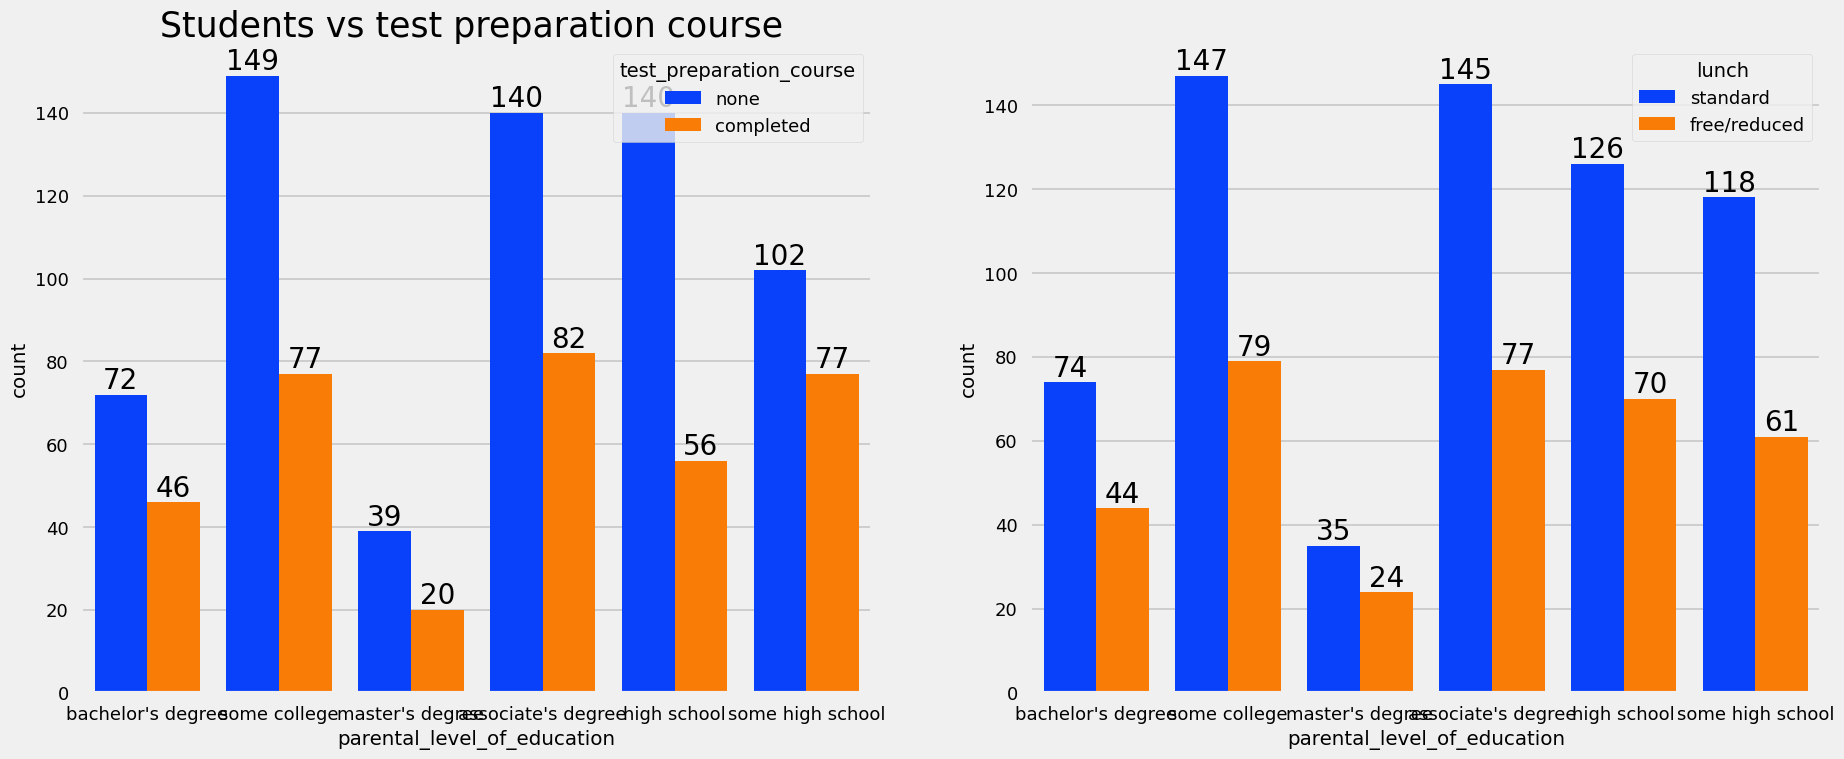

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

4.4.5 Test Preparation Course column

1. Which type of lunch is most common amoung students ?
2. Is Test prepration course has any impact on student's performance ?

Bivariate analysis

<Axes: xlabel='lunch', ylabel='writing_score'>

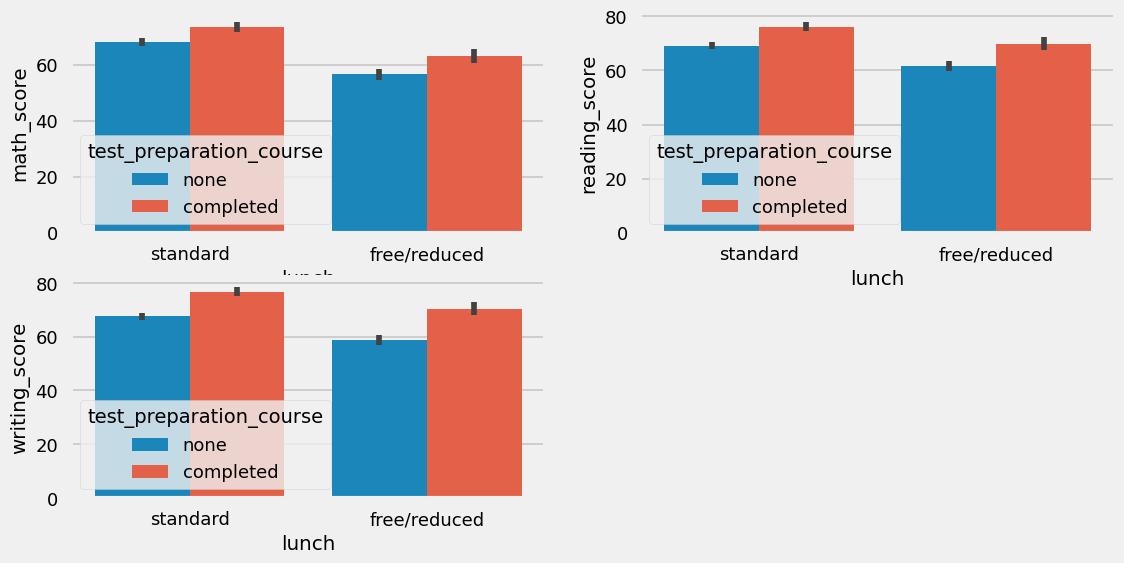

In [44]:
plt.figure(figsize = (12,6))
plt.subplot(221)
sns.barplot(x = df.lunch, y = df.math_score, hue= df.test_preparation_course)
plt.subplot(222)
sns.barplot(x = df.lunch, y = df.reading_score, hue= df.test_preparation_course)
plt.subplot(223)
sns.barplot(x = df.lunch, y = df.writing_score, hue= df.test_preparation_course)

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

4.4.6 Checking outliers

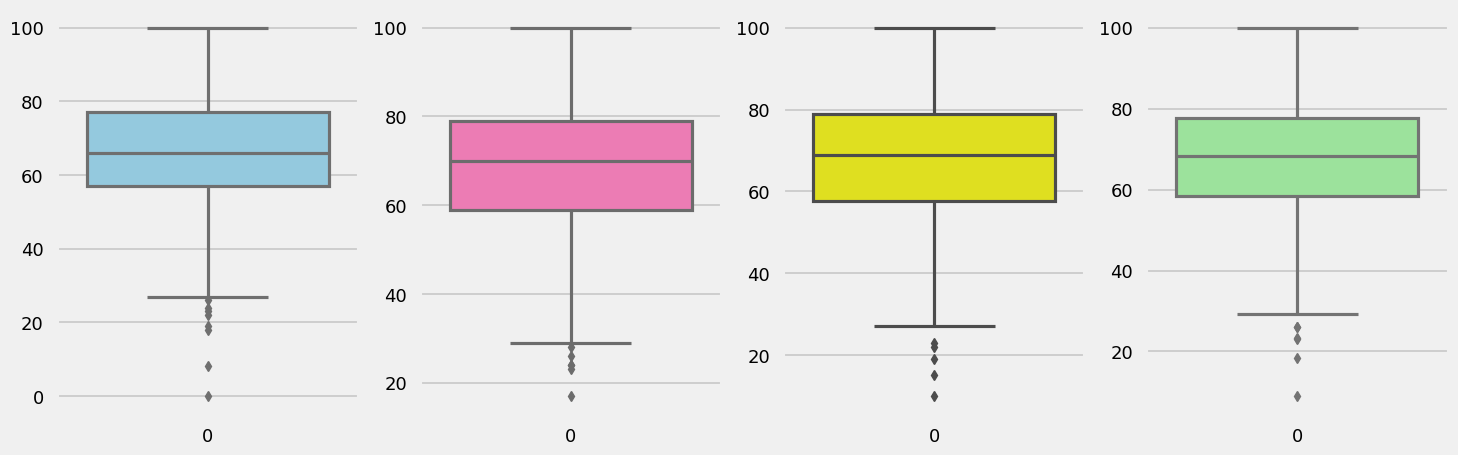

In [48]:
plt.subplots(1,4, figsize = (16,5))
plt.subplot(141)
sns.boxplot(df.math_score, color= 'skyblue')
plt.subplot(142)
sns.boxplot(df.reading_score, color= 'hotpink')
plt.subplot(143)
sns.boxplot(df.writing_score, color= 'yellow')
plt.subplot(144)
sns.boxplot(df.avg_score, color= 'lightgreen')
plt.show()

Multivariate analysis using pairplot

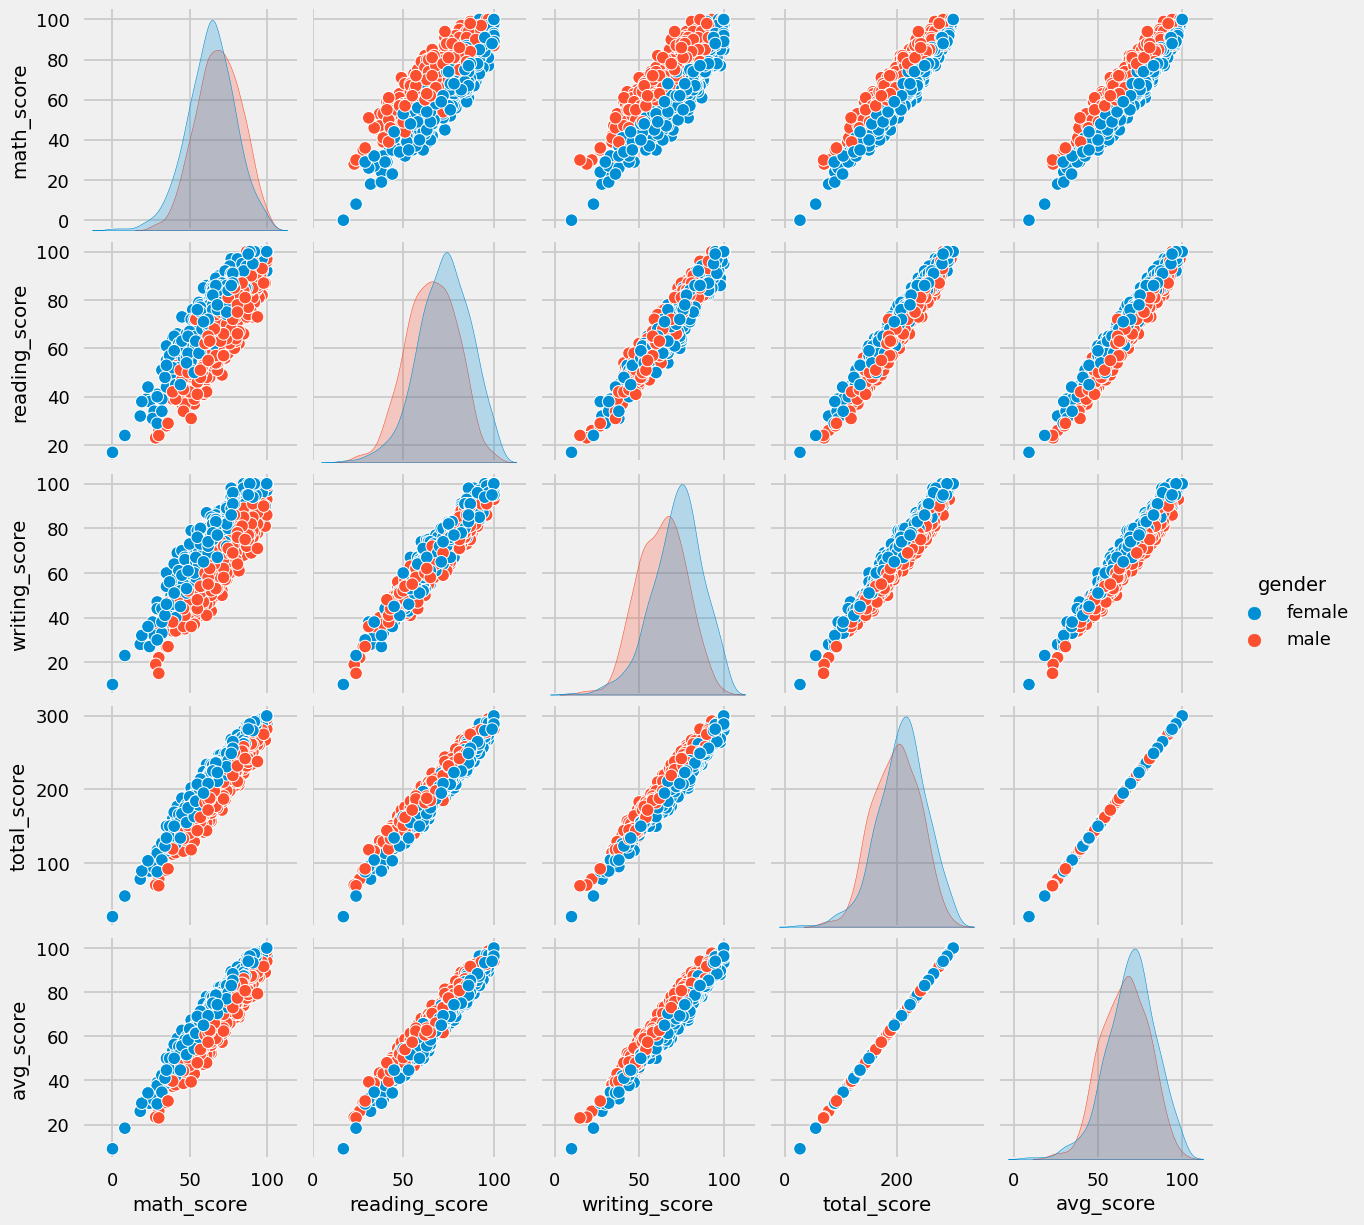

In [49]:
sns.pairplot(df, hue= 'gender')
plt.show()

From the above plot it is clear that all the scores increase linearly with each other.